In [7]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [43]:
events: str = "SHEAR-ZONE_FOLD_FOLD"
dataset_path: Path = Path("../../../dataset/5/models_by_code/") / events

In [46]:
# Load the .npz file
npz_file = np.load(dataset_path / "1.npz")
array = npz_file["arr_0"]

In [52]:
print(f"Array shape: {array.shape}")
print(array.dtype)

Array shape: (2048, 200, 200)
int8


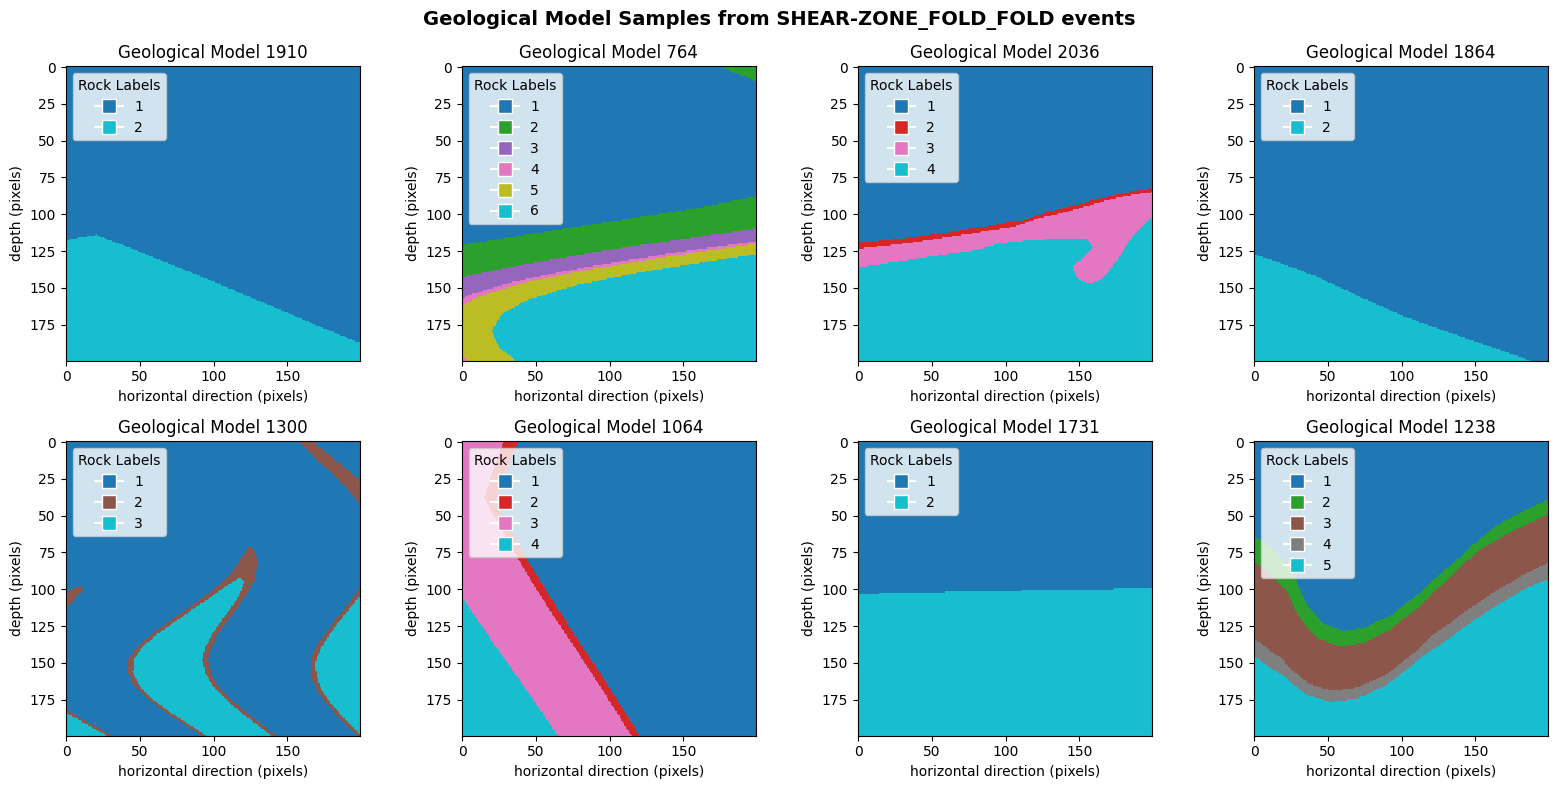

In [55]:
nbr_rows: int = 2
nbr_samples: int = nbr_rows * 4
models_indices = np.random.randint(low=0, high=array.shape[0], size=nbr_samples)

fig, axes = plt.subplots(nrows=nbr_rows, ncols=4, figsize=(16, 8))
axes = axes.flatten()  # Flatten to easily iterate

for sample_idx, (ax, model_idx) in enumerate(zip(axes, models_indices)):
    sample = array[model_idx]
    classes = np.unique(sample)
    cmap = plt.get_cmap("tab10", len(classes))
    colors = [cmap(class_index) for class_index in range(len(classes))]

    class_color_map = dict(zip(classes, colors))
    norm = mcolors.BoundaryNorm(boundaries=np.append(classes - 0.5, classes[-1] + 0.5), ncolors=len(classes))
    cmap_custom = mcolors.ListedColormap(colors)

    im = ax.imshow(sample, cmap=cmap_custom, norm=norm)
    legend_patches = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=str(cls))
                    for cls, color in class_color_map.items()]
    ax.legend(handles=legend_patches, title="Rock Labels", bbox_to_anchor=(0, 1), loc='upper left')
    ax.set_title(f"Geological Model {model_idx}")
    ax.set_ylabel("depth (pixels)")
    ax.set_xlabel("horizontal direction (pixels)")
    
fig.suptitle(f"Geological Model Samples from {events} events", fontsize=14, fontweight='bold')
plt.subplots_adjust(wspace=0.2, hspace=0.3)  # Less horizontal/vertical space
plt.tight_layout()
plt.show()